# Customer Churn Prediction Project Using Random Forest Classifier

## Importing the librariesImporting the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder , LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, ParameterSampler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

### Importing the data set

In [4]:
df = pd.read_csv("Customer_churn_prediction.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.drop(columns = "customerID",inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


* df['price'] = df['price'].astype(float)
* astype(float) works when all values can be safely converted to float.
* while df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
* pd.to_numeric(..., errors='coerce') is safer for messy data — it replaces non-convertible values with NaN.

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# Find indices where the 'price' column has null values
null_indices = df[df['TotalCharges'].isnull()].index
null_indices

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [12]:
df.drop(null_indices,inplace=True)

In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
df.isnull().any() # Tells that dataframe contain any missing values or not

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
# Categorize features
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
nominal_cols = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies', 'PaymentMethod']
ordinal_cols = ['Contract']  # Has intrinsic order
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
integer_cols = ['SeniorCitizen']  # Already encoded as 0/1

 ##### Churn is also a binary column but we are not including in this binary column because it is the output and we do not want get any error andwe dont want to train the model with the output Churn is also a binary column

* In nominal_cols there are column which appear to be only have two value but they have more than two values so that's why they are placed in nominal column. For verification code is given below

In [23]:
# To verify the actual values in each column:
for col in nominal_cols:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values}, Count: {len(unique_values)}")

gender: ['Female' 'Male'], Count: 2
MultipleLines: ['No phone service' 'No' 'Yes'], Count: 3
InternetService: ['DSL' 'Fiber optic' 'No'], Count: 3
OnlineSecurity: ['No' 'Yes' 'No internet service'], Count: 3
OnlineBackup: ['Yes' 'No' 'No internet service'], Count: 3
DeviceProtection: ['No' 'Yes' 'No internet service'], Count: 3
TechSupport: ['No' 'Yes' 'No internet service'], Count: 3
StreamingTV: ['No' 'Yes' 'No internet service'], Count: 3
StreamingMovies: ['No' 'Yes' 'No internet service'], Count: 3
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'], Count: 4


In [24]:
for col in binary_cols:
    unique_values = df[col].unique()
    print(f"{col} : {unique_values}, Count: {len(unique_values)}")

Partner : ['Yes' 'No'], Count: 2
Dependents : ['No' 'Yes'], Count: 2
PhoneService : ['No' 'Yes'], Count: 2
PaperlessBilling : ['Yes' 'No'], Count: 2


##### why contract column is ordinal and payment Method is nominal

# CREATE PREPROCESSING PIPELINE

In [47]:
y =df['Churn'].copy()
le = LabelEncoder()
y = le.fit_transform(y)

In [49]:
X = df.drop('Churn',axis = 1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


### Splitting data set into training set and test set 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Define preprocessing for numerical columns

In [55]:
numerical_transformer = StandardScaler()

### Define preprocessing for Binary columns

In [58]:
""" For binary columns (like Yes/No features) with OneHotEncoder(drop='first'), you'll end up with a single column with 0/1 values - which is effectively the same as what LabelEncoder would produce.
For example, if 'Partner' has values 'Yes' and 'No', after transformation:

With OneHotEncoder(drop='first'), you get one column 'Partner_Yes' (0 if 'No', 1 if 'Yes')
With LabelEncoder(), you might get 'Partner' (0 if 'No', 1 if 'Yes') """

binary_transformer = OneHotEncoder(drop ="first") 

### Define preprocessing for nominal categorical columns

In [61]:
nominal_transformer = OneHotEncoder(drop ="first")

### Define preprocessing for ordinal categorical columns 

In [64]:
contract_categories = [['Month-to-month', 'One year', 'Two year']]
ordinal_transformer = OrdinalEncoder(categories=contract_categories)

## Creating preprocessing steps

In [66]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('int', 'passthrough', integer_cols),  # Already 0/1
        ('bin', binary_transformer, binary_cols),
        ('nom', nominal_transformer, nominal_cols),
        ('ord', ordinal_transformer, ordinal_cols)
    ]
)

## Create pipeline with preprocessing and model

In [69]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state = 42))
])


#### Training the model

In [72]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('int', 'passthrough',
                                                  ['SeniorCitizen']),
                                                 ('bin',
                                                  OneHotEncoder(drop='first'),
                                                  ['Partner', 'Dependents',
                                                   'PhoneService',
                                                   'PaperlessBilling']),
                                                 ('nom',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaymentMethod']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Month-to-month',
                                                                              'One '
                                                                              'year',
                                                                              'Two '
                                                                              'year']]),
                                                  ['Contract'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

#### Making predictions

In [75]:
y_pred = pipeline.predict(X_test)

#### Evaluating the model

In [77]:
print("\nClassification Report: XG Boost Classifier ")
print(classification_report(y_test, y_pred))


Classification Report: XG Boost Classifier 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.62      0.47      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [161]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.7725118483412322


In [81]:
print("\nConfusion Matrix: XG Boost Classifier ")
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


Confusion Matrix: XG Boost Classifier 


array([[1387,  162],
       [ 295,  266]], dtype=int64)

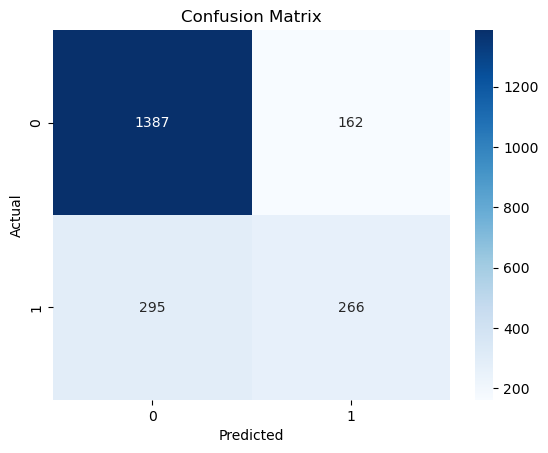

In [83]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Hyperparameter Tunning

##### Create parameter sampler that respects constraints

In [130]:
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 500, 1000],
    'classifier__max_depth': [None, 5, 10, 20, 30, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True], # Keep only True for random_search_true
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__class_weight': ['balanced', 'balanced_subsample']
}

#### When Boostrap is true

In [134]:
random_search_true = RandomizedSearchCV(
    estimator = pipeline_true,           # The machine learning model to tune
    param_distributions= rf_param_grid, # Dictionary of parameters and their distributions
    n_iter= 100,        # Number of parameter combinations to try
    cv=5,                # Number of cross-validation folds
    scoring= 'accuracy',    # Metric to evaluate performance
    n_jobs=-1, # Number of parallel jobs (-1 for all processors)
    verbose = 1,
    error_score='raise',
    random_state=42   # For reproducibility            
)

In [136]:
random_search_true.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['tenure',
                                                                                'MonthlyCharges',
                                                                                'TotalCharges']),
                                                                              ('int',
                                                                               'passthrough',
                                                                               ['SeniorCitizen']),
                                                                              ('bin',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Partner',
                                                                                'Dependents',
                                                                                'PhoneService',
                                                                                'PaperlessBilling']),
                                                                              ('nom',
                                                                               OneHotEncoder(drop='fi...
                   param_distributions={'classifier__bootstrap': [True],
                                        'classifier__class_weight': ['balanced',
                                                                     'balanced_subsample'],
                                        'classifier__max_depth': [None, 5, 10,
                                                                  20, 30, 50],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2',
                                                                     None],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     500,
                                                                     1000]},
                   random_state=42, scoring='accuracy', verbose=1)

In [137]:
print("Best Parameters:", random_search_true.best_params_)
print("Best CV Score:", random_search_true.best_score_)

Best Parameters: {'classifier__n_estimators': 1000, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_features': None, 'classifier__max_depth': 50, 'classifier__class_weight': 'balanced_subsample', 'classifier__bootstrap': True}
Best CV Score: 0.7958161033386982


In [138]:
# Evaluate on test set
best_model = random_search_true.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.7786729857819905

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1549
           1       0.59      0.56      0.57       561

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.71      2110
weighted avg       0.78      0.78      0.78      2110



#### When Boostrap is False

In [149]:
rf_param_false = rf_param_grid.copy()
rf_param_false.update( {
    'classifier__bootstrap': [False],
    'classifier__class_weight': ['balanced']
 })

In [151]:
random_search_false = RandomizedSearchCV(
    estimator = pipeline,           # The machine learning model to tune
    param_distributions= rf_param_grid, # Dictionary of parameters and their distributions
    n_iter= 100,        # Number of parameter combinations to try
    cv=5,                # Number of cross-validation folds
    scoring= 'accuracy',    # Metric to evaluate performance
    n_jobs=-1, # Number of parallel jobs (-1 for all processors)
    verbose = 1,
    error_score='raise',
    random_state=42   # For reproducibility            
)

In [153]:
random_search_false.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['tenure',
                                                                                'MonthlyCharges',
                                                                                'TotalCharges']),
                                                                              ('int',
                                                                               'passthrough',
                                                                               ['SeniorCitizen']),
                                                                              ('bin',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Partner',
                                                                                'Dependents',
                                                                                'PhoneService',
                                                                                'PaperlessBilling']),
                                                                              ('nom',
                                                                               OneHotEncoder(drop='fi...
                   param_distributions={'classifier__bootstrap': [True],
                                        'classifier__class_weight': ['balanced',
                                                                     'balanced_subsample'],
                                        'classifier__max_depth': [None, 5, 10,
                                                                  20, 30, 50],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2',
                                                                     None],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     500,
                                                                     1000]},
                   random_state=42, scoring='accuracy', verbose=1)

In [157]:
print("Best Parameters:", random_search_false.best_params_)
print("Best CV Score:", random_search_false.best_score_)

Best Parameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_features': None, 'classifier__max_depth': None, 'classifier__class_weight': 'balanced_subsample', 'classifier__bootstrap': True}
Best CV Score: 0.797239280260823


In [159]:
# Evaluate on test set
best_model = random_search_false.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.7725118483412322

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1549
           1       0.57      0.56      0.57       561

    accuracy                           0.77      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.77      0.77      0.77      2110

